In [1]:
from collections import Counter
import ast
import re
import matplotlib.pyplot as plt


# Define a hashable dictionary class
class hashabledict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))

In [2]:
cache = {(('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 16, 1): 265600.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 8, 1): 265600.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 4, 1): 265600.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 2, 1): 265600.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 1, 1): 265600.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 1, 2): 265600.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 1, 4): 265600.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 1, 8): 265600.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 8, 1): 122020.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 8, 1): 143580.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 4, 1): 122020.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 4, 1): 143580.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 2, 1): 122020.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 2, 1): 143580.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 1, 1): 122020.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 1, 1): 143580.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 1, 2): 122020.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 1, 2): 143580.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 1, 4): 122020.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 1, 4): 143580.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 1, 8): 122020.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 1, 8): 143580.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 1, 16): 122020.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 1, 16): 143580.001, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 4, 1): 80560.001, (('A100', 'A100', 'A100', 'A100'), (3, 4), 4, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (5, 6), 4, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 4, 1): 102120.001, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 2, 1): 80560.001, (('A100', 'A100', 'A100', 'A100'), (3, 4), 2, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (5, 6), 2, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 2, 1): 102120.001, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 1, 1): 80560.001, (('A100', 'A100', 'A100', 'A100'), (3, 4), 1, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (5, 6), 1, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 1, 1): 102120.001, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 1, 2): 80560.001, (('A100', 'A100', 'A100', 'A100'), (3, 4), 1, 2): 41460.001, (('A100', 'A100', 'A100', 'A100'), (5, 6), 1, 2): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 1, 2): 102120.001, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 1, 4): 80560.001, (('A100', 'A100', 'A100', 'A100'), (3, 4), 1, 4): 41460.001, (('A100', 'A100', 'A100', 'A100'), (5, 6), 1, 4): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 1, 4): 102120.001, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 1, 8): 80560.001, (('A100', 'A100', 'A100', 'A100'), (3, 4), 1, 8): 41460.001, (('A100', 'A100', 'A100', 'A100'), (5, 6), 1, 8): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 1, 8): 102120.001, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 1, 16): 80560.001, (('A100', 'A100', 'A100', 'A100'), (3, 4), 1, 16): 41460.001, (('A100', 'A100', 'A100', 'A100'), (5, 6), 1, 16): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 1, 16): 102120.001, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 1, 32): 80560.001, (('A100', 'A100', 'A100', 'A100'), (3, 4), 1, 32): 41460.001, (('A100', 'A100', 'A100', 'A100'), (5, 6), 1, 32): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 1, 32): 102120.001, (('A100', 'A100'), (5,), 2, 1): 20730.001, (('A100', 'A100'), (6,), 2, 1): 20730.001, (('A100', 'A100'), (7,), 2, 1): 20730.001, (('A100', 'A100'), (8, 9), 2, 1): 81390.001, (('A100', 'A100'), (5,), 1, 1): 20730.001, (('A100', 'A100'), (6,), 1, 1): 20730.001, (('A100', 'A100'), (7,), 1, 1): 20730.001, (('A100', 'A100'), (8, 9), 1, 1): 81390.001, (('A100', 'A100'), (5,), 1, 2): 20730.001, (('A100', 'A100'), (6,), 1, 2): 20730.001, (('A100', 'A100'), (7,), 1, 2): 20730.001, (('A100', 'A100'), (8, 9), 1, 2): 81390.001, (('A100', 'A100'), (5,), 1, 4): 20730.001, (('A100', 'A100'), (6,), 1, 4): 20730.001, (('A100', 'A100'), (7,), 1, 4): 20730.001, (('A100', 'A100'), (8, 9), 1, 4): 81390.001, (('A100', 'A100'), (5,), 1, 8): 20730.001, (('A100', 'A100'), (6,), 1, 8): 20730.001, (('A100', 'A100'), (7,), 1, 8): 20730.001, (('A100', 'A100'), (8, 9), 1, 8): 81390.001, (('A100', 'A100'), (5,), 1, 16): 20730.001, (('A100', 'A100'), (6,), 1, 16): 20730.001, (('A100', 'A100'), (7,), 1, 16): 20730.001, (('A100', 'A100'), (8, 9), 1, 16): 81390.001, (('A100', 'A100'), (5,), 1, 32): 20730.001, (('A100', 'A100'), (6,), 1, 32): 20730.001, (('A100', 'A100'), (7,), 1, 32): 20730.001, (('A100', 'A100'), (8, 9), 1, 32): 81390.001, (('A100', 'A100'), (5,), 1, 64): 20730.001, (('A100', 'A100'), (6,), 1, 64): 20730.001, (('A100', 'A100'), (7,), 1, 64): 20730.001, (('A100', 'A100'), (8, 9), 1, 64): 81390.001, (('A100', 'A100'), (0, 1), 2, 1): 59830.001, (('A100', 'A100', 'A100', 'A100'), (2, 3), 4, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (4, 5), 4, 1): 41460.001, (('A100', 'A100'), (0, 1), 1, 1): 59830.001, (('A100', 'A100', 'A100', 'A100'), (2, 3), 2, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (4, 5), 2, 1): 41460.001, (('A100', 'A100'), (0, 1), 1, 2): 59830.001, (('A100', 'A100', 'A100', 'A100'), (2, 3), 1, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (4, 5), 1, 1): 41460.001, (('A100', 'A100'), (0, 1), 1, 4): 59830.001, (('A100', 'A100', 'A100', 'A100'), (2, 3), 1, 2): 41460.001, (('A100', 'A100', 'A100', 'A100'), (4, 5), 1, 2): 41460.001, (('A100', 'A100'), (0, 1), 1, 8): 59830.001, (('A100', 'A100', 'A100', 'A100'), (2, 3), 1, 4): 41460.001, (('A100', 'A100', 'A100', 'A100'), (4, 5), 1, 4): 41460.001, (('A100', 'A100'), (0, 1), 1, 16): 59830.001, (('A100', 'A100', 'A100', 'A100'), (2, 3), 1, 8): 41460.001, (('A100', 'A100', 'A100', 'A100'), (4, 5), 1, 8): 41460.001, (('A100', 'A100'), (0, 1), 1, 32): 59830.001, (('A100', 'A100', 'A100', 'A100'), (2, 3), 1, 16): 41460.001, (('A100', 'A100', 'A100', 'A100'), (4, 5), 1, 16): 41460.001, (('A100', 'A100'), (0, 1), 1, 64): 59830.001, (('A100', 'A100', 'A100', 'A100'), (2, 3), 1, 32): 41460.001, (('A100', 'A100', 'A100', 'A100'), (4, 5), 1, 32): 41460.001, (('A100', 'A100'), (3,), 2, 1): 20730.001, (('A100', 'A100'), (3,), 1, 1): 20730.001, (('A100', 'A100'), (3,), 1, 2): 20730.001, (('A100', 'A100'), (3,), 1, 4): 20730.001, (('A100', 'A100'), (3,), 1, 8): 20730.001, (('A100', 'A100'), (3,), 1, 16): 20730.001, (('A100', 'A100'), (3,), 1, 32): 20730.001, (('A100', 'A100'), (3,), 1, 64): 20730.001, (('A100', 'A100'), (4,), 2, 1): 20730.001, (('A100', 'A100'), (4,), 1, 1): 20730.001, (('A100', 'A100'), (4,), 1, 2): 20730.001, (('A100', 'A100'), (4,), 1, 4): 20730.001, (('A100', 'A100'), (4,), 1, 8): 20730.001, (('A100', 'A100'), (4,), 1, 16): 20730.001, (('A100', 'A100'), (4,), 1, 32): 20730.001, (('A100', 'A100'), (4,), 1, 64): 20730.001, (('A100', 'A100'), (2,), 2, 1): 20730.001, (('A100', 'A100'), (2,), 1, 1): 20730.001, (('A100', 'A100'), (2,), 1, 2): 20730.001, (('A100', 'A100'), (2,), 1, 4): 20730.001, (('A100', 'A100'), (2,), 1, 8): 20730.001, (('A100', 'A100'), (2,), 1, 16): 20730.001, (('A100', 'A100'), (2,), 1, 32): 20730.001, (('A100', 'A100'), (2,), 1, 64): 20730.001, (('A100', 'A100', 'A100', 'A100'), (6, 7), 4, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (6, 7), 2, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (6, 7), 1, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (6, 7), 1, 2): 41460.001, (('A100', 'A100', 'A100', 'A100'), (6, 7), 1, 4): 41460.001, (('A100', 'A100', 'A100', 'A100'), (6, 7), 1, 8): 41460.001, (('A100', 'A100', 'A100', 'A100'), (6, 7), 1, 16): 41460.001, (('A100', 'A100', 'A100', 'A100'), (6, 7), 1, 32): 41460.001, (('A100', 'A100'), (6, 7), 1, 2): 41460.001, (('A100', 'A100'), (8,), 1, 2): 20730.001, (('A100', 'A100'), (9,), 1, 2): 60660.001, (('A100', 'A100'), (6, 7), 1, 4): 41460.001, (('A100', 'A100'), (8,), 1, 4): 20730.001, (('A100', 'A100'), (9,), 1, 4): 60660.001, (('A100', 'A100'), (6, 7), 1, 8): 41460.001, (('A100', 'A100'), (8,), 1, 8): 20730.001, (('A100', 'A100'), (9,), 1, 8): 60660.001, (('A100', 'A100'), (6, 7), 1, 16): 41460.001, (('A100', 'A100'), (8,), 1, 16): 20730.001, (('A100', 'A100'), (9,), 1, 16): 60660.001, (('A100', 'A100'), (6, 7), 1, 32): 41460.001, (('A100', 'A100'), (8,), 1, 32): 20730.001, (('A100', 'A100'), (9,), 1, 32): 60660.001, (('A100', 'A100'), (6, 7), 1, 64): 41460.001, (('A100', 'A100'), (8,), 1, 64): 20730.001, (('A100', 'A100'), (9,), 1, 64): 60660.001, (('A100', 'A100'), (5, 6), 1, 2): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8), 1, 1): 41460.001, (('A100', 'A100'), (5, 6), 2, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (8, 9), 4, 1): 81390.001, (('A100', 'A100'), (5, 6), 1, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (8, 9), 2, 1): 81390.001, (('A100', 'A100', 'A100', 'A100'), (8, 9), 1, 1): 81390.001, (('A100', 'A100'), (5, 6), 1, 4): 41460.001, (('A100', 'A100', 'A100', 'A100'), (8, 9), 1, 2): 81390.001, (('A100', 'A100'), (5, 6), 1, 8): 41460.001, (('A100', 'A100', 'A100', 'A100'), (8, 9), 1, 4): 81390.001, (('A100', 'A100'), (5, 6), 1, 16): 41460.001, (('A100', 'A100', 'A100', 'A100'), (8, 9), 1, 8): 81390.001, (('A100', 'A100'), (5, 6), 1, 32): 41460.001, (('A100', 'A100', 'A100', 'A100'), (8, 9), 1, 16): 81390.001, (('A100', 'A100'), (5, 6), 1, 64): 41460.001, (('A100', 'A100', 'A100', 'A100'), (8, 9), 1, 32): 81390.001, (('A100', 'A100'), (8,), 2, 1): 20730.001, (('A100', 'A100'), (9,), 2, 1): 60660.001, (('A100', 'A100'), (8,), 1, 1): 20730.001, (('A100', 'A100'), (9,), 1, 1): 60660.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3), 8, 1): 101290.001, (('A100',), (4,), 1, 1): 20730.001, (('A100',), (5,), 1, 1): 20730.001, (('A100',), (6,), 1, 1): 20730.001, (('A100',), (), 1, 1): 0.001, (('A100',), (7,), 1, 1): 20730.001, (('A100',), (8,), 1, 1): 20730.001, (('A100',), (9,), 1, 1): 60660.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3), 4, 1): 101290.001, (('A100',), (4,), 1, 2): 20730.001, (('A100',), (5,), 1, 2): 20730.001, (('A100',), (6,), 1, 2): 20730.001, (('A100',), (), 1, 2): 0.001, (('A100',), (7,), 1, 2): 20730.001, (('A100',), (8,), 1, 2): 20730.001, (('A100',), (9,), 1, 2): 60660.001, (('A100',), (), 1, 4): 0.001, (('A100',), (5,), 1, 4): 20730.001, (('A100',), (6,), 1, 4): 20730.001, (('A100',), (7,), 1, 4): 20730.001, (('A100',), (9,), 1, 4): 20730.001, (('A100',), (5,), 1, 8): 20730.001, (('A100',), (), 1, 8): 0.001, (('A100',), (6,), 1, 8): 20730.001, (('A100',), (7,), 1, 8): 20730.001, (('A100',), (9,), 1, 8): 20730.001, (('A100',), (5,), 1, 16): 20730.001, (('A100',), (), 1, 16): 0.001, (('A100',), (6,), 1, 16): 20730.001, (('A100',), (7,), 1, 16): 20730.001, (('A100',), (9,), 1, 16): 20730.001, (('A100',), (5,), 1, 32): 20730.001, (('A100',), (), 1, 32): 0.001, (('A100',), (6,), 1, 32): 20730.001, (('A100',), (7,), 1, 32): 20730.001, (('A100',), (9,), 1, 32): 20730.001, (('A100',), (5,), 1, 64): 20730.001, (('A100',), (), 1, 64): 0.001, (('A100',), (6,), 1, 64): 20730.001, (('A100',), (7,), 1, 64): 20730.001, (('A100',), (9,), 1, 64): 20730.001, (('A100',), (5,), 1, 128): 20730.001, (('A100',), (), 1, 128): 0.001, (('A100',), (6,), 1, 128): 20730.001, (('A100',), (7,), 1, 128): 20730.001, (('A100',), (9,), 1, 128): 20730.001, (('A100',), (0, 1), 1, 1): 59830.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4), 8, 1): 62190.001, (('A100',), (0, 1), 1, 2): 59830.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4), 4, 1): 62190.001, (('A100',), (0,), 1, 4): 39100.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (1, 2, 3, 4), 2, 1): 82920.001, (('A100',), (8,), 1, 4): 20730.001, (('A100',), (0,), 1, 8): 39100.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (1, 2, 3, 4), 1, 1): 82920.001, (('A100',), (8,), 1, 8): 20730.001, (('A100',), (0,), 1, 16): 39100.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (1, 2, 3, 4), 1, 2): 82920.001, (('A100',), (8,), 1, 16): 20730.001, (('A100',), (0, 1), 1, 32): 59830.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4, 5), 1, 4): 82920.001, (('A100',), (0, 1), 1, 64): 59830.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4, 5), 1, 8): 82920.001, (('A100',), (0, 1), 1, 128): 59830.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4, 5), 1, 16): 82920.001, (('A100',), (2,), 1, 1): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5), 8, 1): 62190.001, (('A100',), (2,), 1, 2): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5), 4, 1): 62190.001, (('A100',), (1,), 1, 4): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4, 5), 2, 1): 82920.001, (('A100',), (1,), 1, 8): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4, 5), 1, 1): 82920.001, (('A100',), (1,), 1, 16): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4, 5), 1, 2): 82920.001, (('A100',), (0,), 1, 32): 39100.001, (('A100',), (1,), 1, 32): 20730.001, (('A100',), (0,), 1, 64): 39100.001, (('A100',), (1,), 1, 64): 20730.001, (('A100',), (0,), 1, 128): 39100.001, (('A100',), (1,), 1, 128): 20730.001, (('A100',), (0,), 1, 1): 39100.001, (('A100',), (1,), 1, 1): 20730.001, (('A100',), (0,), 1, 2): 39100.001, (('A100',), (1,), 1, 2): 20730.001, (('A100',), (2,), 1, 4): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5), 2, 1): 62190.001, (('A100',), (2,), 1, 8): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6), 1, 1): 82920.001, (('A100',), (2,), 1, 16): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6), 1, 2): 82920.001, (('A100',), (2,), 1, 32): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6), 1, 4): 82920.001, (('A100',), (2,), 1, 64): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6), 1, 8): 82920.001, (('A100',), (2,), 1, 128): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6), 1, 16): 82920.001, (('A100',), (3,), 1, 1): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6), 8, 1): 62190.001, (('A100',), (3,), 1, 2): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6), 4, 1): 62190.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6), 2, 1): 82920.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7), 8, 1): 62190.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7), 4, 1): 62190.001, (('A100',), (3,), 1, 4): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6), 2, 1): 62190.001, (('A100',), (3,), 1, 8): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6, 7), 1, 1): 82920.001, (('A100',), (3,), 1, 16): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6, 7), 1, 2): 82920.001, (('A100',), (3,), 1, 32): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6, 7), 1, 4): 82920.001, (('A100',), (3,), 1, 64): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6, 7), 1, 8): 82920.001, (('A100',), (3,), 1, 128): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6, 7), 1, 16): 82920.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 8, 1): 82920.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 4, 1): 82920.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6, 7), 2, 1): 82920.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (6, 7, 8), 8, 1): 62190.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (6, 7, 8), 4, 1): 62190.001, (('A100',), (4,), 1, 4): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 2, 1): 82920.001, (('A100',), (4,), 1, 8): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 1, 1): 82920.001, (('A100',), (4,), 1, 16): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 1, 2): 82920.001, (('A100',), (4,), 1, 32): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 1, 4): 82920.001, (('A100',), (4,), 1, 64): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 1, 8): 82920.001, (('A100',), (4,), 1, 128): 20730.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 1, 16): 82920.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (7, 8, 9), 8, 1): 102120.001, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (7, 8, 9), 4, 1): 102120.001, (('A100', 'A100', 'A100', 'A100'), (0, 1), 4, 1): 59830.001, (('A100', 'A100', 'A100', 'A100'), (1, 2), 4, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (1, 2), 1, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (1, 2), 1, 2): 41460.001, (('A100',), (0, 1), 1, 16): 59830.001, (('A100',), (8,), 1, 32): 20730.001, (('A100',), (8,), 1, 64): 20730.001, (('A100',), (8,), 1, 128): 20730.001, (('A100', 'A100', 'A100', 'A100'), (3,), 4, 1): 20730.001, (('A100', 'A100', 'A100', 'A100'), (4,), 2, 1): 20730.001, (('A100', 'A100', 'A100', 'A100'), (1, 2), 2, 1): 41460.001, (('A100', 'A100'), (6, 7), 2, 1): 41460.001, (('A100', 'A100'), (6, 7), 1, 1): 41460.001, (('A100', 'A100'), (7, 8), 1, 8): 41460.001, (('A100', 'A100'), (7, 8), 1, 16): 41460.001, (('A100', 'A100'), (7, 8), 1, 32): 41460.001, (('A100', 'A100'), (7, 8), 1, 64): 41460.001, (('A100', 'A100', 'A100', 'A100'), (5,), 4, 1): 20730.001, (('A100', 'A100', 'A100', 'A100'), (5,), 2, 1): 20730.001, (('A100', 'A100', 'A100', 'A100'), (4,), 4, 1): 20730.001, (('A100', 'A100', 'A100', 'A100'), (2,), 4, 1): 20730.001, (('A100', 'A100', 'A100', 'A100'), (7,), 4, 1): 20730.001, (('A100', 'A100'), (3, 4), 1, 2): 41460.001, (('A100', 'A100'), (3, 4), 1, 4): 41460.001, (('A100',), (0, 1), 1, 4): 59830.001, (('A100',), (0, 1), 1, 8): 59830.001, (('A100', 'A100', 'A100', 'A100'), (6, 7, 8), 1, 4): 62190.001, (('A100', 'A100', 'A100', 'A100'), (6, 7, 8), 1, 8): 62190.001, (('A100', 'A100', 'A100', 'A100'), (6, 7, 8), 1, 16): 62190.001, (('A100', 'A100', 'A100', 'A100'), (6, 7, 8), 1, 32): 62190.001, (('A100', 'A100', 'A100', 'A100'), (7, 8), 1, 4): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8), 1, 8): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8), 1, 16): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8), 1, 32): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8), 4, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8), 2, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7, 8), 1, 2): 41460.001, (('A100', 'A100', 'A100', 'A100'), (6,), 4, 1): 20730.001, (('A100', 'A100'), (4, 5), 2, 1): 41460.001, (('A100', 'A100'), (4, 5), 1, 1): 41460.001, (('A100', 'A100'), (4, 5), 1, 2): 41460.001, (('A100', 'A100'), (4, 5), 1, 4): 41460.001, (('A100', 'A100'), (7, 8), 2, 1): 41460.001, (('A100', 'A100'), (7, 8), 1, 2): 41460.001, (('A100', 'A100'), (7, 8), 1, 4): 41460.001, (('A100', 'A100', 'A100', 'A100'), (3,), 2, 1): 20730.001, (('A100', 'A100', 'A100', 'A100'), (5, 6, 7), 1, 4): 62190.001, (('A100', 'A100', 'A100', 'A100'), (5, 6, 7), 1, 8): 62190.001, (('A100', 'A100', 'A100', 'A100'), (5, 6, 7), 1, 16): 62190.001, (('A100', 'A100', 'A100', 'A100'), (5, 6, 7), 1, 32): 62190.001, (('A100', 'A100'), (3, 4), 2, 1): 41460.001, (('A100', 'A100', 'A100', 'A100'), (7,), 2, 1): 20730.001, (('A100', 'A100', 'A100', 'A100'), (7,), 1, 2): 20730.001, (('A100', 'A100', 'A100', 'A100'), (8,), 4, 1): 20730.001, (('A100',), (8, 9), 1, 1): 81390.001, (('A100', 'A100'), (), 2, 1): 0.001, (('A100', 'A100'), (1,), 2, 1): 20730.001, (('A100', 'A100'), (1,), 1, 2): 20730.001}


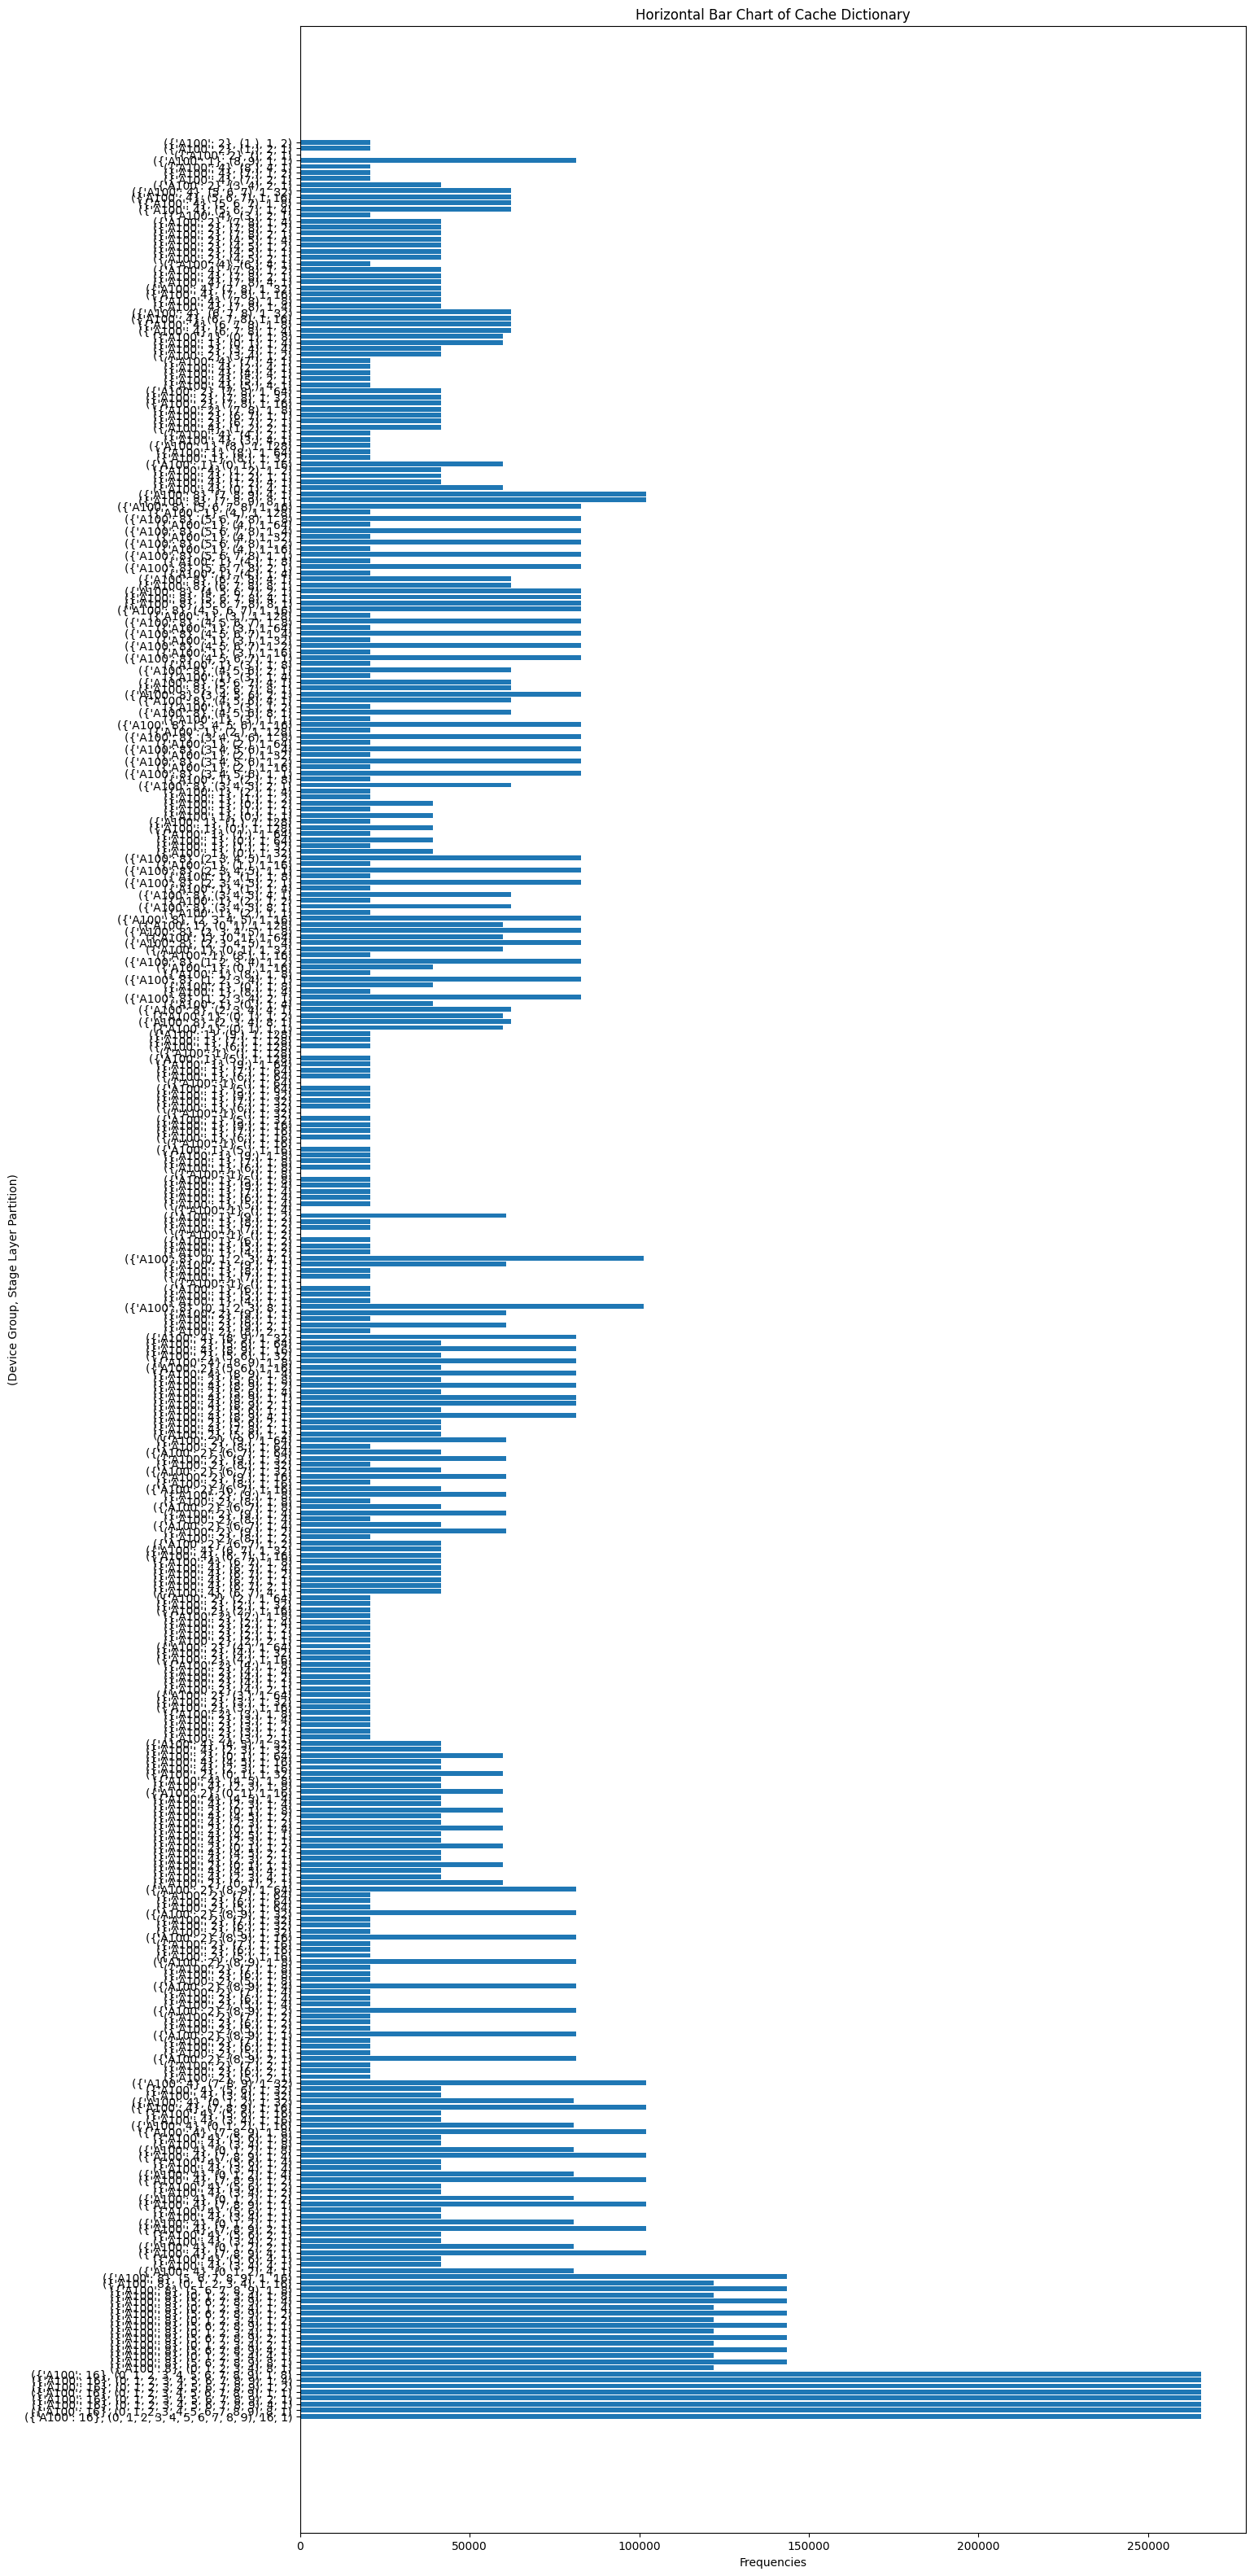

In [3]:
cache_dict = {}
for key, value in cache.items():
    cache_dict[(hashabledict(dict(Counter(tuple(key[0])))), key[1], key[2], key[3])] = value

# Extract keys and values from the dictionary
keys = list(cache_dict.keys())
values = list(cache_dict.values())

# Create a horizontal bar chart
plt.figure(figsize=(15, 40))
plt.barh(range(len(keys)), values, tick_label=[str(k) for k in keys])
plt.yticks(rotation=0)
plt.ylabel('(Device Group, Stage Layer Partition)')
plt.xlabel('Frequencies')
plt.title('Horizontal Bar Chart of Cache Dictionary')
plt.show()